# Crawling Satu Berita

In [1]:
#melakukan web scraping pada halaman berita yang berasal dari URL
import requests
from bs4 import BeautifulSoup
import nltk

# Unduh konten halaman web berita
url = "https://www.bbc.com/indonesia/articles/cxrvr59632eo"
response = requests.get(url)
html = response.text

# Parsing halaman web menggunakan BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# Ekstraksi teks dari elemen-elemen yang berisi berita
article = soup.find('div', class_="bbc-1cvxiy9")  # Sesuaikan dengan struktur HTML halaman web berita

# Periksa apakah elemen article ada sebelum mencoba mengambil teksnya
if article is not None:
    article_text = article.get_text()

    # Tokenisasi teks menjadi kalimat menggunakan nltk
    nltk.download('punkt')  # Pastikan Anda sudah mengunduh tokenisasi kalimat nltk
    sentences = nltk.sent_tokenize(article_text)

    # Cetak kalimat-kalimat
    for sentence in sentences:
        print(sentence)
else:
    print("Elemen berita tidak ditemukan")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Apa tujuan akhir invasi darat Israel ke Gaza?
Sumber gambar, ReutersKeterangan gambar, Militer Israel telah memanggil sejumlah tentara cadangan untuk bertempur melawan Hamas.1 November 2023Paul KirbyBBC NewsPara pemimpin Israel telah menegaskan bahwa kelompok milisi Palestina, Hamas, akan dimusnahkan dari muka bumi dan Gaza tidak akan pernah kembali seperti semula.“Setiap anggota Hamas adalah orang mati,” kata Perdana Menteri Benjamin Netanyahu setelah kelompok milisi tersebut membunuh lebih dari 1.300 orang dalam serangan yang tak terduga ke Israel pada 7 Oktober.Tujuan Operasi Pedang Besi – operasi serangan balasan Israel atas serangan Hamas – nampaknya jauh lebih ambisius dibandingkan apa pun yang direncanakan militer Israel di Gaza sebelumnya.
Lewatkan Artikel-artikel yang direkomendasikan dan terus membacaArtikel-artikel yang direkomendasikanPalestina: Tentara Israel ‘serbu’ RS Al-Shifa di Gaza dengan tankSejarah Deklarasi Balfour: 67 kata yang membentuk Negara Israel dan mengubah

In [2]:
#menghitung dan mencetak nilai TF-IDF (Term Frequency-Inverse Document Frequency)
#untuk setiap kata dalam setiap kalimat dari teks yang telah di-tokenisasi sebelumnya.
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi penghitung TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Hitung TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

# Daftar kata kunci
feature_names = tfidf_vectorizer.get_feature_names_out()

# Konversi matriks TF-IDF menjadi bentuk yang lebih mudah dibaca
tfidf_values = tfidf_matrix.toarray()

# Cetak TF-IDF untuk setiap kata dalam setiap kalimat
for i, sentence in enumerate(sentences):
    print(f"Kalimat {i + 1}: {sentence}")
    for j, word in enumerate(feature_names):
        tfidf_value = tfidf_values[i][j]
        if tfidf_value > 0:
            print(f"{word}: {tfidf_value:.4f}")
    print()

Kalimat 1: Apa tujuan akhir invasi darat Israel ke Gaza?
akhir: 0.4198
apa: 0.3913
darat: 0.3464
gaza: 0.2286
invasi: 0.4198
israel: 0.1956
ke: 0.3280
tujuan: 0.4198

Kalimat 2: Sumber gambar, ReutersKeterangan gambar, Militer Israel telah memanggil sejumlah tentara cadangan untuk bertempur melawan Hamas.1 November 2023Paul KirbyBBC NewsPara pemimpin Israel telah menegaskan bahwa kelompok milisi Palestina, Hamas, akan dimusnahkan dari muka bumi dan Gaza tidak akan pernah kembali seperti semula.“Setiap anggota Hamas adalah orang mati,” kata Perdana Menteri Benjamin Netanyahu setelah kelompok milisi tersebut membunuh lebih dari 1.300 orang dalam serangan yang tak terduga ke Israel pada 7 Oktober.Tujuan Operasi Pedang Besi – operasi serangan balasan Israel atas serangan Hamas – nampaknya jauh lebih ambisius dibandingkan apa pun yang direncanakan militer Israel di Gaza sebelumnya.
2023paul: 0.1169
300: 0.1169
adalah: 0.0763
akan: 0.1294
ambisius: 0.1169
anggota: 0.1037
apa: 0.0813
atas: 0.

In [3]:
#menghitung kemiripan kosinus (cosine similarity) antara dua kalimat berdasarkan vektor representasi TF-IDF dari masing-masing kalimat.
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Indeks kalimat yang akan dibandingkan
sentence1_index = 0  # Ganti dengan indeks kalimat pertama yang ingin Anda bandingkan
sentence2_index = 1  # Ganti dengan indeks kalimat kedua yang ingin Anda bandingkan

# Ambil vektor TF-IDF untuk kedua kalimat
tfidf_vector1 = tfidf_matrix[sentence1_index]
tfidf_vector2 = tfidf_matrix[sentence2_index]

# Hitung cosine similarity antara kedua vektor
similarity = cosine_similarity(tfidf_vector1, tfidf_vector2)

# Cetak hasil cosine similarity
print(f"Cosine Similarity antara Kalimat {sentence1_index + 1} dan Kalimat {sentence2_index + 1}: {similarity[0][0]:.4f}")


Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.1521


In [4]:
#menghitung dan mencetak kemiripan kosinus (cosine similarity) antara semua pasangan kalimat dalam teks yang telah di-tokenisasi

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)
# Cetak hasil similarity_matrix
num_sentences = len(sentences)  # Jumlah kalimat
for i in range(num_sentences):
    for j in range(i+1, num_sentences):
        similarity = similarity_matrix[i][j]
        print(f"Cosine Similarity antara Kalimat {i + 1} dan Kalimat {j + 1}: {similarity:.4f}")


Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.1521
Cosine Similarity antara Kalimat 1 dan Kalimat 3: 0.1505
Cosine Similarity antara Kalimat 1 dan Kalimat 4: 0.0993
Cosine Similarity antara Kalimat 1 dan Kalimat 5: 0.2738
Cosine Similarity antara Kalimat 1 dan Kalimat 6: 0.0434
Cosine Similarity antara Kalimat 1 dan Kalimat 7: 0.1608
Cosine Similarity antara Kalimat 1 dan Kalimat 8: 0.0403
Cosine Similarity antara Kalimat 1 dan Kalimat 9: 0.0892
Cosine Similarity antara Kalimat 1 dan Kalimat 10: 0.1248
Cosine Similarity antara Kalimat 1 dan Kalimat 11: 0.1471
Cosine Similarity antara Kalimat 1 dan Kalimat 12: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 13: 0.1008
Cosine Similarity antara Kalimat 1 dan Kalimat 14: 0.0409
Cosine Similarity antara Kalimat 1 dan Kalimat 15: 0.0139
Cosine Similarity antara Kalimat 1 dan Kalimat 16: 0.0395
Cosine Similarity antara Kalimat 1 dan Kalimat 17: 0.0441
Cosine Similarity antara Kalimat 1 dan Kalimat 18: 0.0224
Cosine Similarity anta

In [5]:
#membuat dan mencetak DataFrame menggunakan hasil perhitungan cosine similarity antara semua pasangan kalimat dalam teks yang telah di-tokenisasi dan matriks TF-IDF
import pandas as pd

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Cetak DataFrame
df


,Kalimat 1,Kalimat 2,Kalimat 3,Kalimat 4,Kalimat 5,Kalimat 6,Kalimat 7,Kalimat 8,Kalimat 9,Kalimat 10,...,Kalimat 17,Kalimat 18,Kalimat 19,Kalimat 20,Kalimat 21,Kalimat 22,Kalimat 23,Kalimat 24,Kalimat 25,Kalimat 26
Kalimat 1,1.000000,0.152126,0.150536,0.099341,0.273756,0.043403,0.160784,0.040289,0.089226,0.124761,...,0.044116,0.022417,0.043528,0.105202,0.000000,0.232615,0.000000,0.087304,0.053187,0.011980
Kalimat 2,0.152126,1.000000,0.141135,0.121555,0.053200,0.259602,0.106121,0.077538,0.228185,0.131023,...,0.204840,0.031735,0.182975,0.289360,0.080413,0.177995,0.128301,0.194602,0.120966,0.086899
Kalimat 3,0.150536,0.141135,1.000000,0.278940,0.063450,0.079021,0.118770,0.043427,0.080989,0.079500,...,0.147151,0.082984,0.127258,0.209579,0.031580,0.111717,0.020289,0.149713,0.104380,0.049107
Kalimat 4,0.099341,0.121555,0.278940,1.000000,0.016459,0.057979,0.076337,0.054688,0.066537,0.209673,...,0.074255,0.015915,0.036363,0.140255,0.042512,0.094249,0.046765,0.103038,0.062027,0.017526
Kalimat 5,0.273756,0.053200,0.063450,0.016459,1.000000,0.029218,0.086666,0.019568,0.046360,0.000000,...,0.064695,0.049381,0.040821,0.089834,0.010326,0.101861,0.000000,0.116178,0.091394,0.009368
Kalimat 6,0.043403,0.259602,0.079021,0.057979,0.029218,1.000000,0.048626,0.096921,0.052717,0.079478,...,0.167149,0.010752,0.161431,0.214111,0.015950,0.140967,0.012292,0.131778,0.097601,0.044271
Kalimat 7,0.160784,0.106121,0.118770,0.076337,0.086666,0.048626,1.000000,0.031774,0.096837,0.086418,...,0.141753,0.079330,0.140390,0.106468,0.016446,0.090718,0.019392,0.142995,0.111000,0.081406
Kalimat 8,0.040289,0.077538,0.043427,0.054688,0.019568,0.096921,0.031774,1.000000,0.039701,0.021570,...,0.043564,0.017285,0.089125,0.135407,0.000000,0.111715,0.000000,0.076081,0.016645,0.000000
Kalimat 9,0.089226,0.228185,0.080989,0.066537,0.046360,0.052717,0.096837,0.039701,1.000000,0.093169,...,0.111894,0.042298,0.118866,0.199979,0.055824,0.096565,0.015461,0.086249,0.044098,0.025741
Kalimat 10,0.124761,0.131023,0.079500,0.209673,0.000000,0.079478,0.086418,0.021570,0.093169,1.000000,...,0.090069,0.000000,0.078252,0.138655,0.011842,0.120401,0.025301,0.108301,0.130646,0.038197


In [7]:
#membangun sebuah graf yang merepresentasikan hubungan antara kalimat dalam teks berdasarkan kemiripan (similarity) antara kalimat-kalimat tersebut.
import networkx as nx

# Buat grafik dari matriks similarity
G = nx.Graph()

# Tambahkan simpul (node) ke grafik yang mewakili setiap kalimat
for sentence in sentences:
    G.add_node(sentence)

# Tambahkan tepi (edge) antara kalimat berdasarkan similarity
for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        similarity = df.iloc[i, j]  # Mengambil similarity dari DataFrame
        if similarity > 0:
            G.add_edge(sentences[i], sentences[j], weight=similarity)

# Hitung closeness centrality untuk setiap simpul
closeness_centrality = nx.closeness_centrality(G, distance='weight')

# Cetak closeness centrality
for sentence, centrality in closeness_centrality.items():
    print(f"Closeness Centrality of {sentence}: {centrality:.4f}")


Closeness Centrality of Apa tujuan akhir invasi darat Israel ke Gaza?: 27.1361
Closeness Centrality of Sumber gambar, ReutersKeterangan gambar, Militer Israel telah memanggil sejumlah tentara cadangan untuk bertempur melawan Hamas.1 November 2023Paul KirbyBBC NewsPara pemimpin Israel telah menegaskan bahwa kelompok milisi Palestina, Hamas, akan dimusnahkan dari muka bumi dan Gaza tidak akan pernah kembali seperti semula.“Setiap anggota Hamas adalah orang mati,” kata Perdana Menteri Benjamin Netanyahu setelah kelompok milisi tersebut membunuh lebih dari 1.300 orang dalam serangan yang tak terduga ke Israel pada 7 Oktober.Tujuan Operasi Pedang Besi – operasi serangan balasan Israel atas serangan Hamas – nampaknya jauh lebih ambisius dibandingkan apa pun yang direncanakan militer Israel di Gaza sebelumnya.: 15.3880
Closeness Centrality of Lewatkan Artikel-artikel yang direkomendasikan dan terus membacaArtikel-artikel yang direkomendasikanPalestina: Tentara Israel ‘serbu’ RS Al-Shifa di Ga

{0: Text(0.6902101478519761, -0.05783083260776327, '0'),
 1: Text(-0.3911611579383105, -0.36701210754167335, '1'),
 2: Text(-0.37894553447555557, 0.20304675913219192, '2'),
 3: Text(-0.1075515035066418, -0.13438661639595997, '3'),
 4: Text(-0.44933923286502436, 0.7640699061991638, '4'),
 5: Text(-0.5959727273891081, 0.44077826272639914, '5'),
 6: Text(0.1896626913322648, 0.5063470511489332, '6'),
 7: Text(0.04632427965458272, -0.900651651230772, '7'),
 8: Text(0.6166523357459529, -0.36191496715957205, '8'),
 9: Text(0.48879727097532505, 0.3728543504670614, '9'),
 10: Text(0.6030545084007972, 0.16661038426919922, '10'),
 11: Text(-0.6727300657851591, -1.0, '11'),
 12: Text(-0.04725660027277932, 0.18429773743802216, '12'),
 13: Text(0.42557070606226693, -0.5484164034229954, '13'),
 14: Text(0.03210470794494378, -0.41112634717692903, '14'),
 15: Text(0.8909357069283187, -0.21039970223488233, '15'),
 16: Text(-0.6984299225522488, 0.12847657226827464, '16'),
 17: Text(0.6399364071285545, 0.

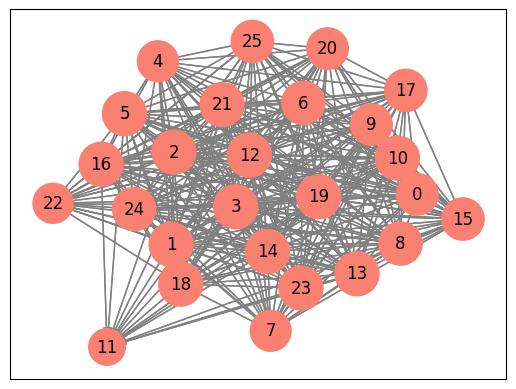

In [10]:
#membuat grafik berarah (Directed Graph - DiGraph) yang merepresentasikan hubungan antara kalimat-kalimat dalam teks berdasarkan kemiripan (cosine similarity)
import networkx as nx
import pandas as pd

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat grafik berarah (DiGraph) berdasarkan similarity_matrix
G = nx.DiGraph()
for i in range(len(similarity_matrix)):
    G.add_node(i)  # Tambahkan node dengan indeks numerik

for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > 0 and i != j:  # Pastikan node tidak menghubungkan dirinya sendiri
            G.add_edge(i, j)

# Hitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Visualisasi closeness centrality
pos = nx.spring_layout(G)  # Atur layout grafik
node_size = [v * 1000 for v in closeness_centrality.values()]  # Ubah ukuran node berdasarkan closeness centrality, dengan faktor pengurangan ukuran

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='salmon')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

# plt.show()

# Cetak closeness centrality dari yang tertinggi hingga terendah
#print("Closeness Centrality (Dari Tertinggi ke Terendah):")
#sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)

#for node, closeness in sorted_closeness:
 #   sentence = sentences[node]  # Akses kalimat yang sesuai dengan node
  #  print(f"Node {node}: Closeness Centrality {closeness:.4f}")
   # print(f"Kalimat: {sentence}")
    #print()

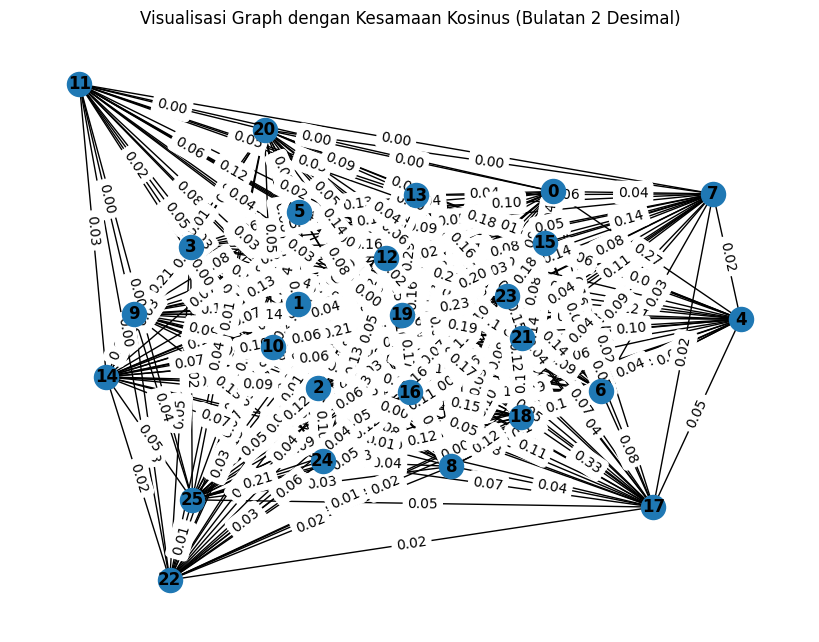

In [11]:
import math
from collections import Counter
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import matplotlib.pyplot as plt

# Diasumsikan similarity_matrix sudah didefinisikan sebelumnya
# Contoh similarity_matrix

G = nx.Graph()
for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix[0])):
        if i != j:
            similarity = round(similarity_matrix[i][j], 2)  # Bulatkan nilai ke 2 angka dibelakang koma
            G.add_edge(i, j, weight=similarity)

# Visualisasi grafik
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Menentukan layout grafik
nx.draw(G, pos, with_labels=True, font_weight='bold')  # Menggambar grafik dengan label node
edge_labels = nx.get_edge_attributes(G, 'weight')  # Mendapatkan atribut edge (bobot)
# Mengubah nilai bobot menjadi string dengan 2 angka di belakang koma
edge_labels = {(i, j): f"{weight:.2f}" for (i, j), weight in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)  # Menampilkan label bobot pada edge
plt.title("Visualisasi Graph dengan Kesamaan Kosinus (Bulatan 2 Desimal)")
plt.show()


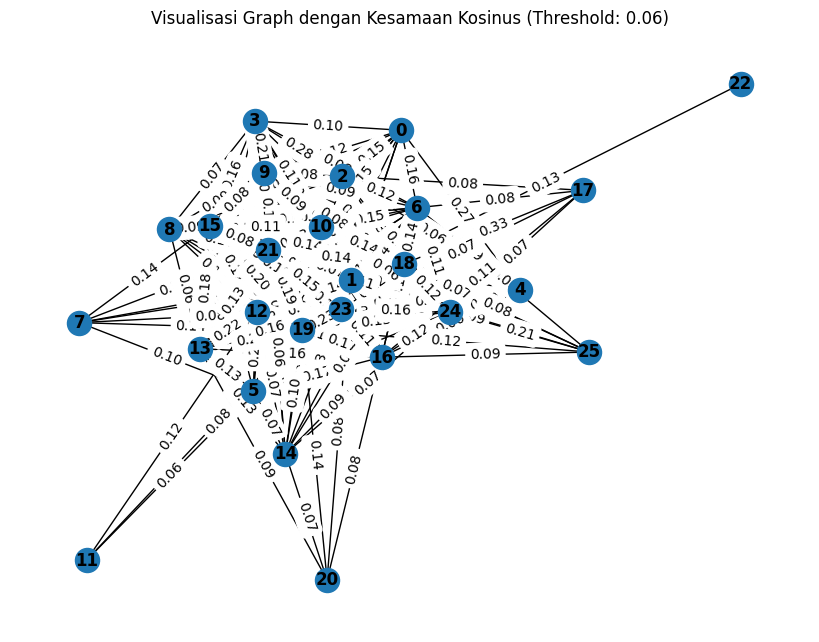

In [12]:
import math
from collections import Counter
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import matplotlib.pyplot as plt

# Diasumsikan similarity_matrix sudah didefinisikan sebelumnya
# Contoh similarity_matrix

G = nx.Graph()
threshold = 0.06  # Threshold untuk menyambungkan node

# Tambahkan semua node ke grafik
G.add_nodes_from(range(len(similarity_matrix)))

# Tambahkan edge antara node yang nilainya melebihi threshold
for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix[0])):
        if i != j and similarity_matrix[i][j] > threshold:
            similarity = round(similarity_matrix[i][j], 2)  # Bulatkan nilai ke 2 angka dibelakang koma
            G.add_edge(i, j, weight=similarity)

# Visualisasi grafik
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Menentukan layout grafik
nx.draw(G, pos, with_labels=True, font_weight='bold')  # Menggambar grafik dengan label node
edge_labels = nx.get_edge_attributes(G, 'weight')  # Mendapatkan atribut edge (bobot)
# Mengubah nilai bobot menjadi string dengan 2 angka di belakang koma
edge_labels = {(i, j): f"{weight:.2f}" for (i, j), weight in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)  # Menampilkan label bobot pada edge

# Tambahkan label pada node yang tidak terhubung
isolated_nodes = list(nx.isolates(G))
if isolated_nodes:
    # isolated_nodes_labels = {node: f'Node {node} (Not connected)' for node in isolated_nodes}
    pos_extra = {node: (pos[node][0], pos[node][1] + 0.1) for node in isolated_nodes}

plt.title(f"Visualisasi Graph dengan Kesamaan Kosinus (Threshold: {threshold})")
plt.show()


In [13]:
# Menghitung closeness centrality dari graph
closeness = nx.closeness_centrality(G)

# Menampilkan closeness centrality
print("Closeness Centrality:")
for node, closeness_value in closeness.items():
    print(f"Node {node}: {closeness_value}")

# Menampilkan 3 kalimat dengan PageRank tertinggi
sorted_pagerank = sorted(closeness.items(), key=lambda x: x[1], reverse=True)

print("=============================")
print("Top 3 sentences based on closeness centrality:")
for node, rank in sorted_pagerank[:3]:
    print(sentence[node])

print("=============================")
print("Top 3 node based on closeness centrality:")
for node, rank in sorted_pagerank[:3]:
    print(f"Node {node} dengan PageRank {rank:.4f}")

Closeness Centrality:
Node 0: 0.6578947368421053
Node 1: 0.9259259259259259
Node 2: 0.8064516129032258
Node 3: 0.7142857142857143
Node 4: 0.5952380952380952
Node 5: 0.7352941176470589
Node 6: 0.8333333333333334
Node 7: 0.5813953488372093
Node 8: 0.7142857142857143
Node 9: 0.7575757575757576
Node 10: 0.8064516129032258
Node 11: 0.5208333333333334
Node 12: 0.8333333333333334
Node 13: 0.7352941176470589
Node 14: 0.6756756756756757
Node 15: 0.7575757575757576
Node 16: 0.8620689655172413
Node 17: 0.5434782608695652
Node 18: 0.8064516129032258
Node 19: 0.8928571428571429
Node 20: 0.5555555555555556
Node 21: 0.8333333333333334
Node 22: 0.49019607843137253
Node 23: 0.8333333333333334
Node 24: 0.78125
Node 25: 0.5813953488372093
Top 3 sentences based on closeness centrality:
a
 
n
Top 3 node based on closeness centrality:
Node 1 dengan PageRank 0.9259
Node 19 dengan PageRank 0.8929
Node 16 dengan PageRank 0.8621


In [14]:
# Hitung PageRank
pagerank = nx.pagerank(G)

# Menampilkan Closeness Centrality
print("PageRank:")
for node, rank in pagerank.items():
    print(f"Node {node}: {rank}")

# Menampilkan 3 kalimat dengan PageRank tertinggi
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

print("=============================")
print("Top 3 sentences based on PageRank:")
for node, rank in sorted_pagerank[:3]:
    print(sentence[node])

print("=============================")
print("Top 3 node based on PageRank:")
for node, rank in sorted_pagerank[:3]:
    print(f"Node {node} dengan PageRank {rank:.4f}")

#sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

PageRank:
Node 0: 0.035266735487009274
Node 1: 0.0740351266659516
Node 2: 0.04776704638694228
Node 3: 0.036221262417755376
Node 4: 0.02314523976344751
Node 5: 0.0431176306606629
Node 6: 0.042986955509830005
Node 7: 0.018170090160343065
Node 8: 0.03354792475919927
Node 9: 0.0363643301300688
Node 10: 0.047941463959741006
Node 11: 0.010186337406598215
Node 12: 0.061338536307687375
Node 13: 0.04299212607988153
Node 14: 0.024977057561236804
Node 15: 0.04268128521183246
Node 16: 0.05166594788110044
Node 17: 0.018275378856023424
Node 18: 0.051317581449919304
Node 19: 0.07337983030411209
Node 20: 0.01366157738454769
Node 21: 0.05040046316176729
Node 22: 0.008041832303686831
Node 23: 0.05390933677316859
Node 24: 0.0402576609889259
Node 25: 0.018351242428561017
Top 3 sentences based on PageRank:
a
 
a
Top 3 node based on PageRank:
Node 1 dengan PageRank 0.0740
Node 19 dengan PageRank 0.0734
Node 12 dengan PageRank 0.0613
